In [17]:
!pip install pandas plotnine --user

  Using cached https://files.pythonhosted.org/packages/e1/cf/e895bd6aea6c12b97fb9e014657aaa8a886b9fd6fc1eb3e90f9f55ddf71a/plotnine-0.8.0-py3-none-any.whl


In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
import timeit


C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:

# breast_cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print(df.columns)
df.shape

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


(569, 31)

In [5]:
features = df.columns[0:30] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])
features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

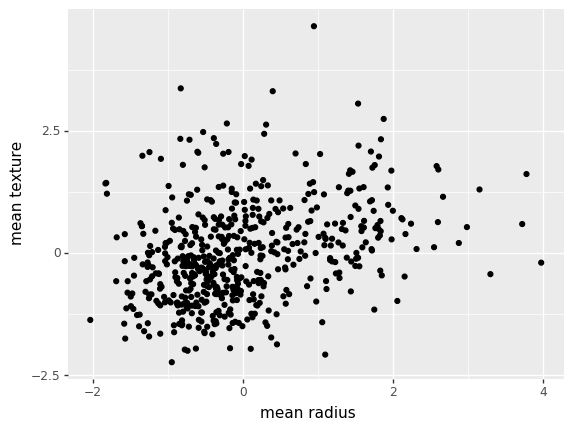

<ggplot: (-9223371910286868392)>

In [6]:
ggplot(df, aes(x = "mean radius", y = "mean texture")) + geom_point()

In [7]:
pca = PCA()
pca.fit(df[features])
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_


30


array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [8]:
pcaDF = pd.DataFrame({"pc": range(1,len(pca.explained_variance_ratio_)+1),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343


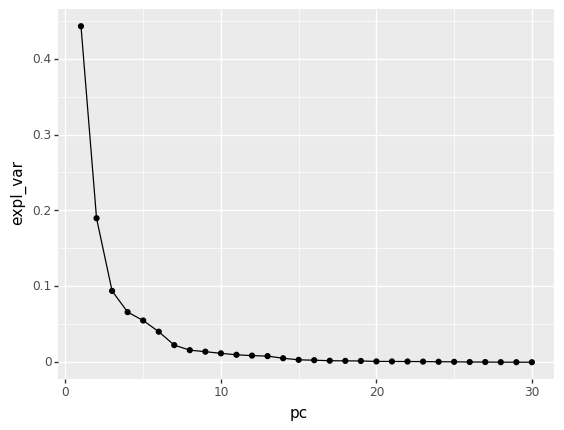

<ggplot: (-9223371910272309308)>

In [9]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

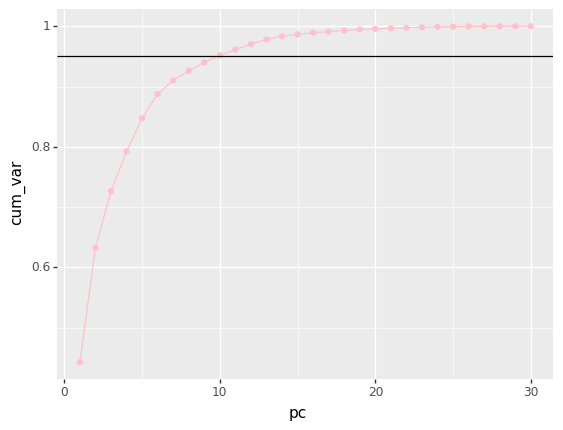

<ggplot: (-9223371910270165920)>

In [10]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [11]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])
df10 = pd.DataFrame(data[:, 0:10])


#modeMod1
start = time.time()

lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

end = time.time()
print(f"Runtime is {end - start}")

#modeMod1

start = time.time()

lr2 = LogisticRegression()
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))

end = time.time()
print(f"Runtime is {end - start}")



#modeMod1
start = time.time()

lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))

end = time.time()
print(f"Runtime is {end - start}")

all data:  0.9876977152899824
Runtime is 0.04197835922241211
10 PCs:    0.9859402460456942
Runtime is 0.012992382049560547
4 PCs:     0.9701230228471002
Runtime is 0.01099252700805664


C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
C:\Users\Youssef\Anaconda3\lib\site-packages\sk

# load my dataset

In [12]:
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

In [13]:
print(df.columns)
df.shape

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


(178, 14)

In [14]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
features = df.columns[0:13] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])
features

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

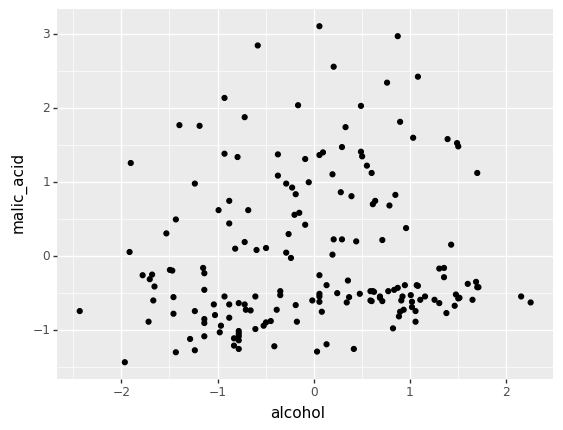

<ggplot: (-9223371910270122480)>

In [16]:
ggplot(df, aes(x = "alcohol", y = "malic_acid")) + geom_point()

In [17]:
pca = PCA()
pca.fit(df[features])
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

13
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [18]:
pcaDF = pd.DataFrame({"pc": range(1,14),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.361988,0.361988
1,2,0.192075,0.554063
2,3,0.111236,0.665300
3,4,0.070690,0.735990
4,5,0.065633,0.801623


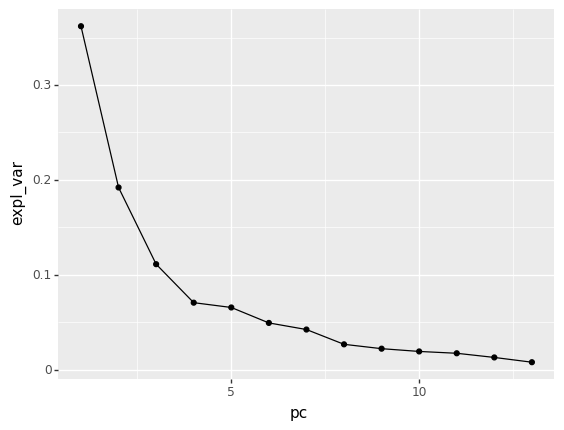

<ggplot: (-9223371910270135004)>

In [19]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

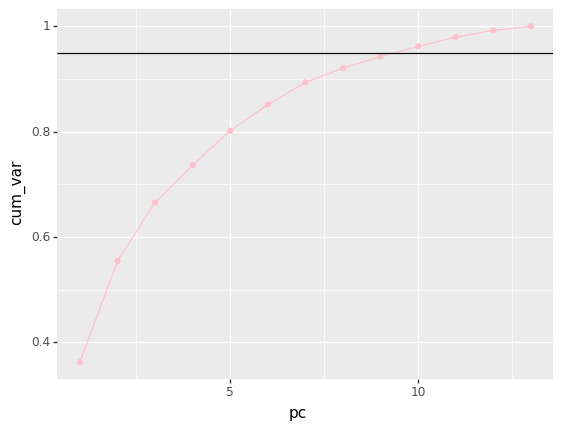

<ggplot: (-9223371910286770352)>

In [20]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [24]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])
df10 = pd.DataFrame(data[:, 0:10])


#modeMod1
start = time.time()

lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

end = time.time()
print(f"Runtime is {end - start}")




#modeMod1

start = time.time()

lr2 = LogisticRegression()
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))

end = time.time()
print(f"Runtime is {end - start}")



#modeMod1
start = time.time()

lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))

end = time.time()
print(f"Runtime is {end - start}");

all data:  1.0
Runtime is 0.01598954200744629
10 PCs:    0.9943820224719101
Runtime is 0.0069963932037353516
4 PCs:     0.9719101123595506
Runtime is 0.009993553161621094


C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
C:\Users\

### We notice that program execute time is low when we use df4